# Titanic - Machine Learning from Disaster

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
data = pd.read_csv("../input/titanic/train.csv")
test_data = pd.read_csv("../input/titanic/test.csv")

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.shape

(891, 12)

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Data Storytelling

In [7]:
def fill_wedge(value):
    format_value = round(value, 2)
    return str(format_value) + "%"

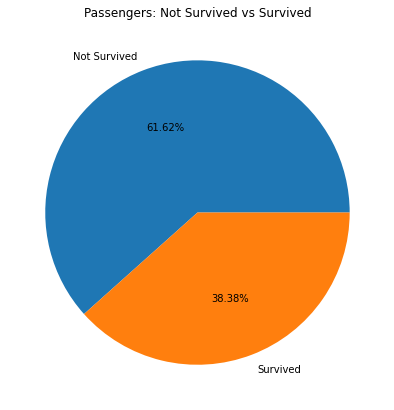

In [8]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data["Survived"].value_counts(), labels = ["Not Survived", "Survived"], autopct = fill_wedge)
plt.title("Passengers: Not Survived vs Survived")
plt.show()

* Out of all the passengers, 62% did not survive, and 38% did survive. 
* So I can say the probability of surviving abord the Titanic of a random passenger is 38.38% while the probability of not surviving is 61.62%

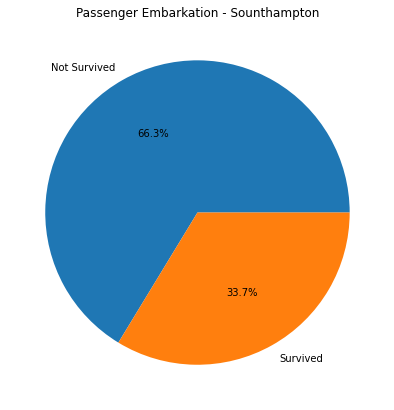

In [9]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data[data["Embarked"] == "S"]["Survived"].value_counts(), labels = ["Not Survived", "Survived"], autopct = fill_wedge)
plt.title("Passenger Embarkation - Sounthampton")
plt.show()

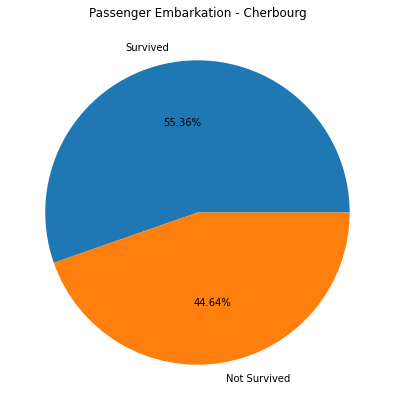

In [10]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data[data["Embarked"] == "C"]["Survived"].value_counts(), labels = ["Survived", "Not Survived"], autopct = fill_wedge)
plt.title("Passenger Embarkation - Cherbourg")
plt.show()

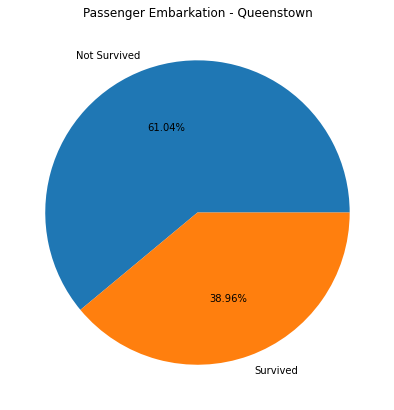

In [11]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data[data["Embarked"] == "Q"]["Survived"].value_counts(), labels = ["Not Survived", "Survived"], autopct = fill_wedge)
plt.title("Passenger Embarkation - Queenstown")
plt.show()

* Almost all the passengers who embarked at Southampton intended to go to New York, Because most of people who embarked at Southampton did not survive.
* Same can be said for passengers embarked at Cherbourg. 
* So it can be concluded that very few passengers got off from Titanic between the stops Sounthampton and Queenstown

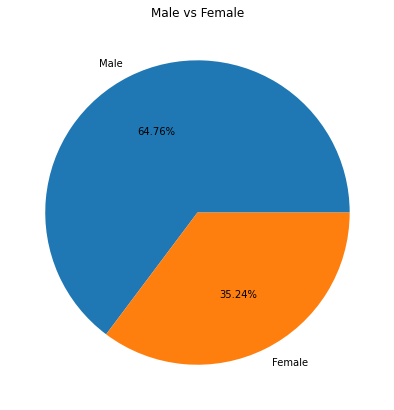

In [12]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data["Sex"].value_counts(), labels = ["Male", "Female"], autopct = fill_wedge)
plt.title("Male vs Female")
plt.show()

* Aboard the Titanic, 65% of population was of Male and 35% of population was of Female

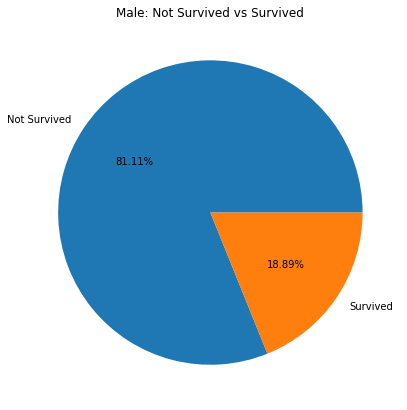

In [13]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data[data["Sex"] == "male"]["Survived"].value_counts(), labels = ["Not Survived", "Survived"], autopct = fill_wedge)
plt.title("Male: Not Survived vs Survived")
plt.show()

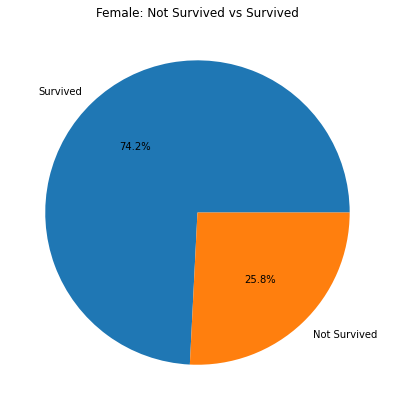

In [14]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data[data["Sex"] == "female"]["Survived"].value_counts(), labels = ["Survived", "Not Survived"], autopct = fill_wedge)
plt.title("Female: Not Survived vs Survived")
plt.show()

* Out of male passengers, 19% did survive and 81% did not survive.
* Out of female passengers, 74% did survive and 26% did not survive.
* The probability of passenger did not survive given that he is of sex male is 81.11% 
* The probability of a passenger did not survive given that she is of sex female is 25.8%

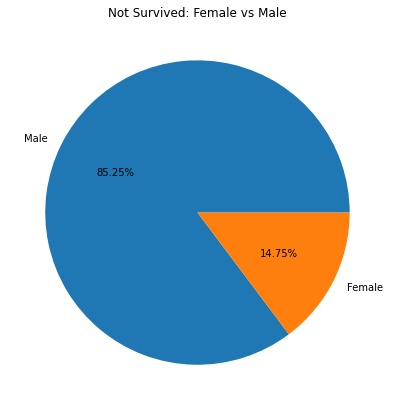

In [15]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data[data["Survived"] == 0]["Sex"].value_counts(), labels = ["Male", "Female"], autopct = fill_wedge)
plt.title("Not Survived: Female vs Male")
plt.show()

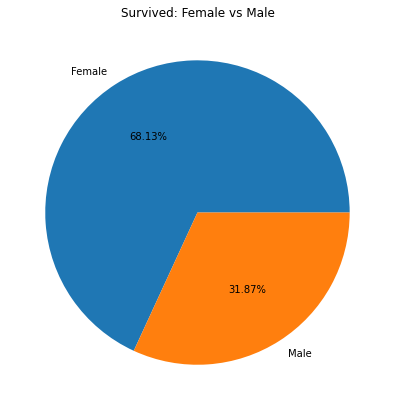

In [16]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data[data["Survived"] == 1]["Sex"].value_counts(), labels = ["Female", "Male"], autopct = fill_wedge)
plt.title("Survived: Female vs Male")
plt.show()

* Of all the passengers who did not survive, 85% of them were of sex Male and 15% of them were of sex Female
* Of all the passengers who did survive, 68% of them were of sex Female and 31% of them were of sex Male
* So most of the passengers of the sex Male did not survive, and most of the passengers of the sex Female did survive

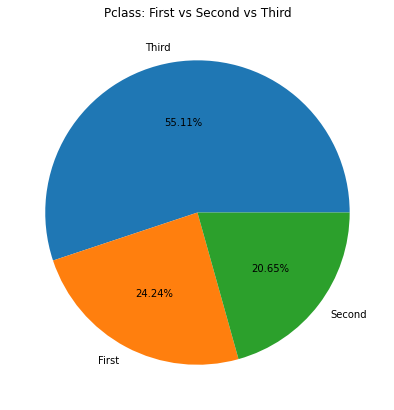

In [17]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data["Pclass"].value_counts(), labels = ["Third", "First", "Second"], autopct = fill_wedge)
plt.title("Pclass: First vs Second vs Third")
plt.show()

* There are 55% passengers with third class ticket, 21% passengers with second class ticket, and 24% passengers with first class ticket


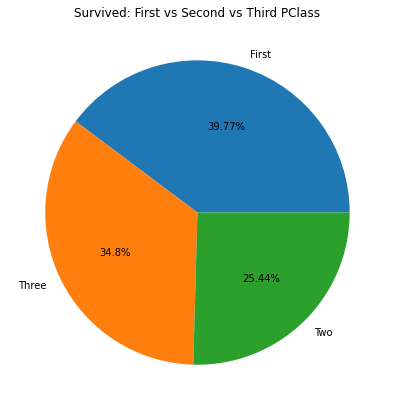

In [18]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data[data["Survived"] == 1]["Pclass"].value_counts(), labels = ["First", "Three", "Two"], autopct = fill_wedge)
plt.title("Survived: First vs Second vs Third PClass")
plt.show()

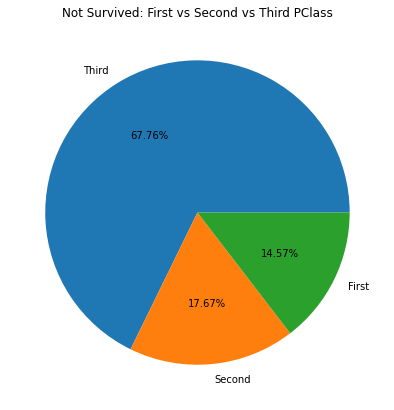

In [19]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data[data["Survived"] == 0]["Pclass"].value_counts(), labels = ["Third", "Second", "First"], autopct = fill_wedge)
plt.title("Not Survived: First vs Second vs Third PClass")
plt.show()

* Out of all the passengers who did survive 40% of them had first class ticket, 25% of them had second class ticket, and 35% of them had third class ticket.
* Out of all the passengers who did not survive 15% of them had first class ticket, 18% of them had second class ticket, and 68% of them had third class ticket.
* Probability of third class ticket given that the passenger did not survive is 67.76%.
* Probability of second class ticket given that the passenger did not survive is 17.67%
* Probability of first class ticket given that the passenger did not survive is 14.57%

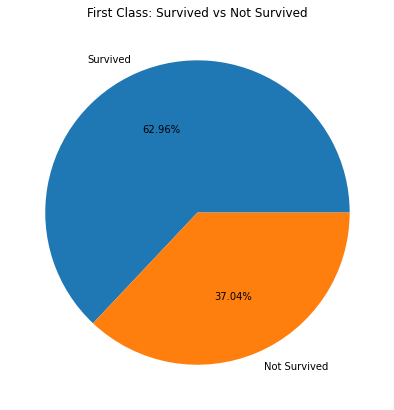

In [20]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data[data["Pclass"] == 1]["Survived"].value_counts(), labels = ["Survived", "Not Survived"], autopct = fill_wedge)
plt.title("First Class: Survived vs Not Survived")
plt.show()

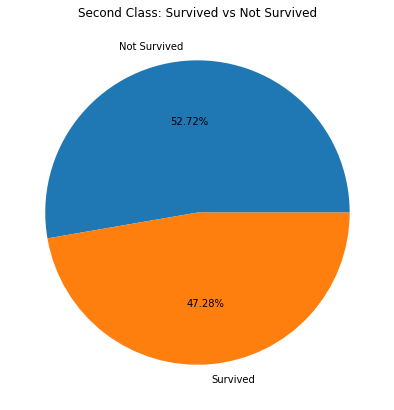

In [21]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data[data["Pclass"] == 2]["Survived"].value_counts(), labels = ["Not Survived", "Survived"], autopct = fill_wedge)
plt.title("Second Class: Survived vs Not Survived")
plt.show()

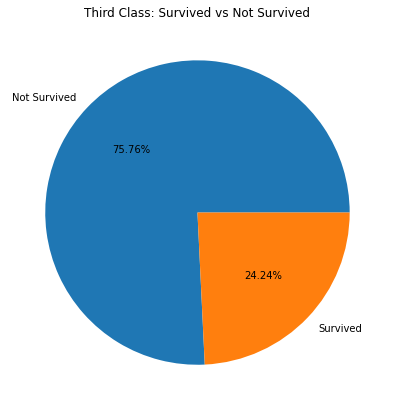

In [22]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data[data["Pclass"] == 3]["Survived"].value_counts(), labels = ["Not Survived", "Survived"], autopct = fill_wedge)
plt.title("Third Class: Survived vs Not Survived")
plt.show()

* Out of all the passengers having first class ticket 63% of them Survived while 37% of them did not survive.
* Out of all the passengers having third class ticket 76% of them did not survive and 24% of them survived.
* Out of all the passengers having second class ticket 53% of them did not survive, while 47% of them survived.
* The probability of not surviving given that the passenger has first class ticket is 37.04%
* The probability of not surviving given that the passenger has second class ticket is 52.72%
* The probability of not surviving given that the passenger has third class ticket is 75.76%

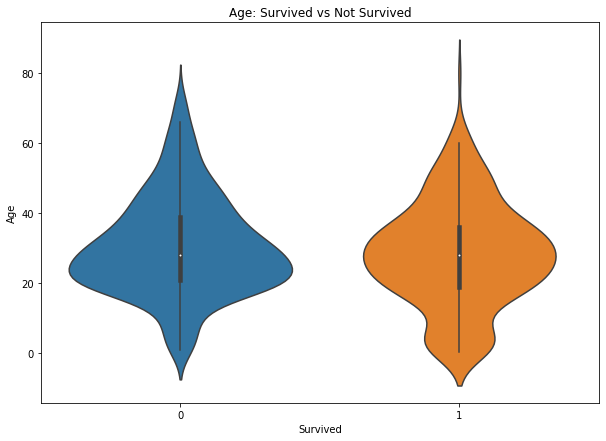

In [23]:
fig = plt.figure(figsize =(10, 7))
sns.violinplot(x = data["Survived"], y = data["Age"])
plt.title("Age: Survived vs Not Survived")
plt.show()

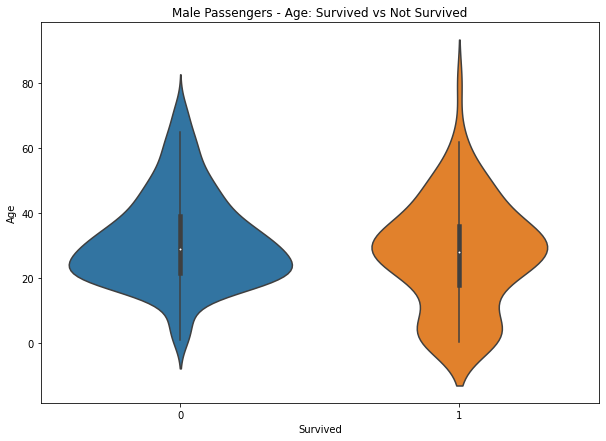

In [24]:
fig = plt.figure(figsize =(10, 7))
sns.violinplot(x = data[data["Sex"] == "male"]["Survived"], y = data[data["Sex"] == "male"]["Age"])
plt.title("Male Passengers - Age: Survived vs Not Survived")
plt.show()

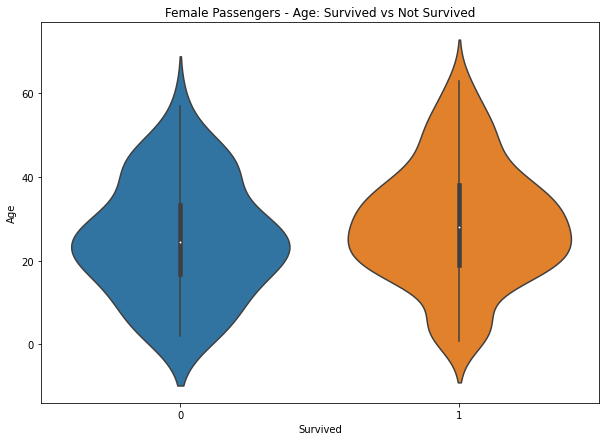

In [25]:
fig = plt.figure(figsize =(10, 7))
sns.violinplot(x = data[data["Sex"] == "female"]["Survived"], y = data[data["Sex"] == "female"]["Age"])
plt.title("Female Passengers - Age: Survived vs Not Survived")
plt.show()

* Here the distributions of passengers age of survived and not survived is almost the same.
* So, The Age feature is useless, I will remove this feature.

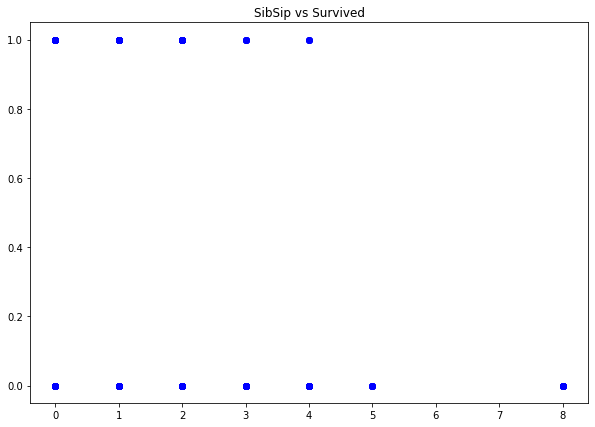

In [26]:
fig = plt.figure(figsize =(10, 7))
plt.plot(data["SibSp"], data["Survived"], 'bo')
plt.title("SibSip vs Survived")
plt.show()

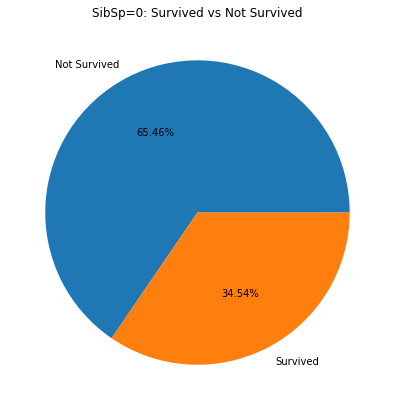

In [27]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data[data["SibSp"] == 0]["Survived"].value_counts(), labels = ["Not Survived", "Survived"], autopct = fill_wedge)
plt.title("SibSp=0: Survived vs Not Survived")
plt.show()

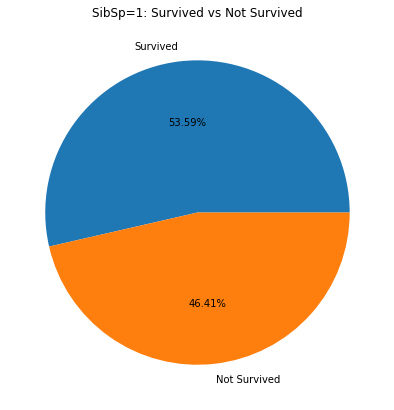

In [28]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data[data["SibSp"] == 1]["Survived"].value_counts(), labels = ["Survived", "Not Survived"], autopct = fill_wedge)
plt.title("SibSp=1: Survived vs Not Survived")
plt.show()

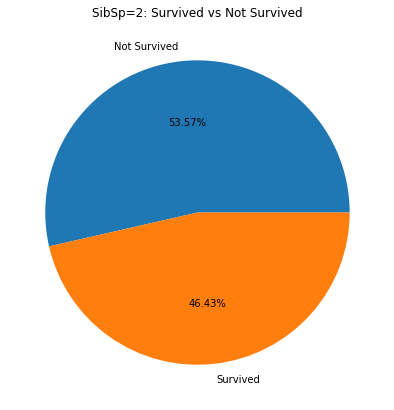

In [29]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data[data["SibSp"] == 2]["Survived"].value_counts(), labels = ["Not Survived", "Survived"], autopct = fill_wedge)
plt.title("SibSp=2: Survived vs Not Survived")
plt.show()

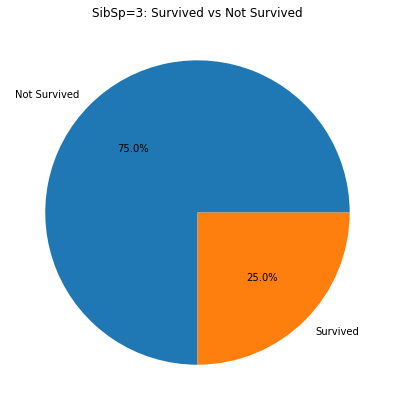

In [30]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data[data["SibSp"] == 3]["Survived"].value_counts(), labels = ["Not Survived", "Survived"], autopct = fill_wedge)
plt.title("SibSp=3: Survived vs Not Survived")
plt.show()

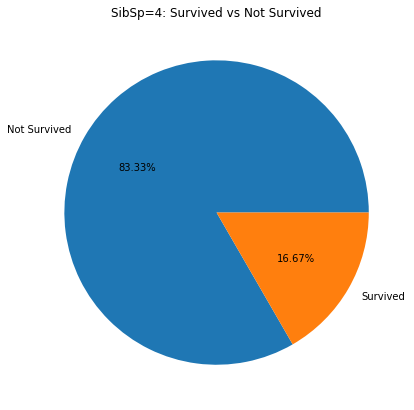

In [31]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data[data["SibSp"] == 4]["Survived"].value_counts(), labels = ["Not Survived", "Survived"], autopct = fill_wedge)
plt.title("SibSp=4: Survived vs Not Survived")
plt.show()

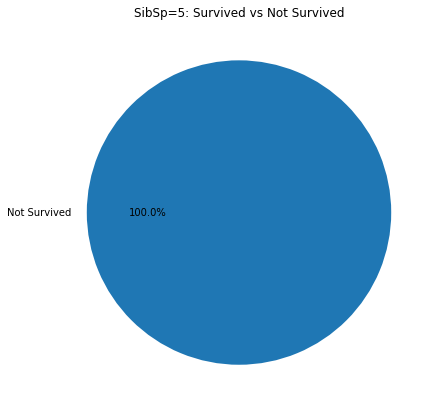

In [32]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data[data["SibSp"] == 5]["Survived"].value_counts(), labels = ["Not Survived"], autopct = fill_wedge)
plt.title("SibSp=5: Survived vs Not Survived")
plt.show()

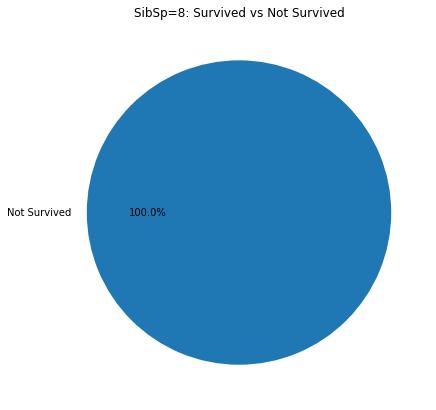

In [33]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data[data["SibSp"] == 8]["Survived"].value_counts(), labels = ["Not Survived"], autopct = fill_wedge)
plt.title("SibSp=8: Survived vs Not Survived")
plt.show()

* As the number of Siblings/Spouses increase, more chance that they will not survive
* Same can be said for Parents/Children feature

## Exploratory Data Analysis

In [34]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
data = data.drop(["PassengerId", "Name", "Age", "Ticket", "Fare", "Cabin"], axis=1)

In [36]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

* Filling the missing embarked value with "C"(Cherbourg), because the probability that the passenger survived given the embarked at "C" is almost 50%.

In [37]:
data[data["Embarked"].isnull()]["Embarked"]

61     NaN
829    NaN
Name: Embarked, dtype: object

In [38]:
data.iloc[61, 5] = "C"
data.iloc[829, 5] = "C"

In [39]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

* Catagorical features like "Sex" and "Embarked" are to be converted into numerical features.
* I will use one hot encoding to convert the categorical features to numerical features

In [40]:
X = data.iloc[:, [1, 2, 3, 4, 5]]
y = data.iloc[:, 0]

In [41]:
X = pd.get_dummies(X)

In [42]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

* Combination of Undersamping and SMOTE will be used to handle the imbalance in the classes.
* First I will use undersampling to reduce the number of datapoints in the majority class to 450
* Then SMOTE will be used to increase the number of datapoints in the minority class to 450.

In [43]:
rus = RandomUnderSampler(sampling_strategy ={0: 450})
X_res, y_res = rus.fit_resample(X, y)

In [44]:
y_res.value_counts()

0    450
1    342
Name: Survived, dtype: int64

In [45]:
smote = SMOTE(sampling_strategy = {1: 450})
X_final, y_final = smote.fit_resample(X_res, y_res)

In [46]:
y_final.value_counts()

0    450
1    450
Name: Survived, dtype: int64

## Model Building

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [48]:
K_values = list(range(1, 201))

kf = KFold(n_splits=5)
acc_score_cv = []
acc_score_train = []

for K in K_values:
    total_acc_cv = []
    total_acc_train = []
    for train_index, test_index in kf.split(X_train):
        X_tr , X_cv = X.iloc[train_index,:],X.iloc[test_index,:]
        y_tr , y_cv = y[train_index] , y[test_index]
        model = KNeighborsClassifier(n_neighbors=K)
        model.fit(X_tr, y_tr)
        
        total_acc_cv.append(model.score(X_cv, y_cv))
        total_acc_train.append(model.score(X_tr, y_tr))
    
    avg_acc_cv = (sum(total_acc_cv)) / len(total_acc_cv)
    avg_acc_train = (sum(total_acc_train)) / len(total_acc_train)
        
    acc_score_cv.append(avg_acc_cv)
    acc_score_train.append(avg_acc_train)

In [49]:
optimal_K = acc_score_cv.index(max(acc_score_cv)) + 1
print("The optimal value of hyperparameter K is: " + str(optimal_K))

The optimal value of hyperparameter K is: 10


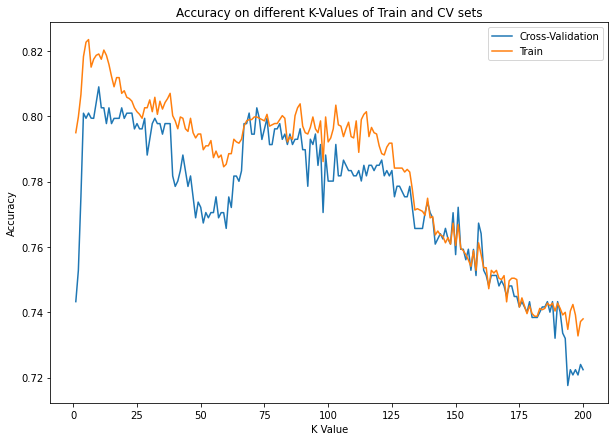

In [50]:
fig = plt.figure(figsize = (10, 7))
plt.plot(K_values, acc_score_cv, label = "Cross-Validation")
plt.plot(K_values, acc_score_train, label = "Train")
plt.legend()
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy on different K-Values of Train and CV sets")
plt.show()

* In the graph as hyperparameter K increases, performance of train set decreases, Because at K=1 the model overfits.
* The performance on cross-validation set increases and then decreases (towards underfitting).
* The value of optimal hyperparameter K is the value which results in highest cross-validation accuracy.

## Model Evaluation

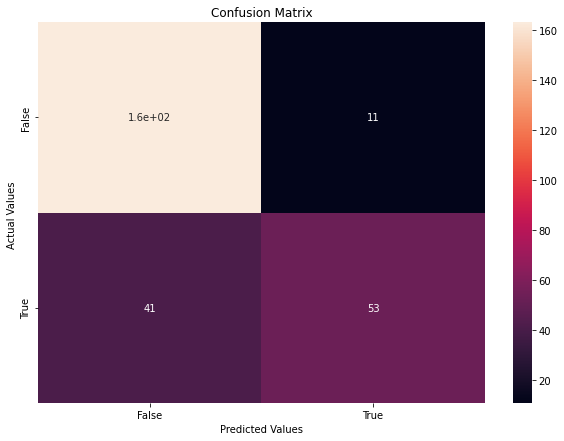

In [51]:
model = KNeighborsClassifier(n_neighbors=optimal_K)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize = (10, 7))
ax = sns.heatmap(cf_matrix, annot = True)
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [52]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       174
           1       0.83      0.56      0.67        94

    accuracy                           0.81       268
   macro avg       0.81      0.75      0.77       268
weighted avg       0.81      0.81      0.80       268

